# Analyzing the Evolution of Gender Representation in Indian Cinema Through the Bechdel Test

## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/preprocessed - Copy - Copy.csv', encoding='latin-1')
df.head()

,Title,Rating,Release Year,Genres,Language,score
0,Khilona,5.700,1970,Drama,Hindi,0.0
1,Sachaa Jhutha,6.583,1970,"Family, Action, Comedy, Crime, Drama, Music",Hindi,0.0
2,Pavitra Papi,10.000,1970,Drama,Hindi,0.0
3,Johny Mera Naam,7.300,1970,"Thriller, Music, Action, Drama, Family",Hindi,0.0
4,Uski Roti,6.382,1970,Drama,Hindi,0.0


In [ ]:
df.isnull().sum()

Title             0
Rating            0
Release Year      0
Genres            0
Language          0
score           938
dtype: int64

In [ ]:
# Filling all the null values with 0 for the bechdal test
df['score'] = df['score'].fillna(0)

In [ ]:
df['Language'].unique()

array(['Hindi', 'Tamil', 'Telugu', 'Tamil '], dtype=object)

In [ ]:
# Removing the space from 'Tamil '
df[df['Language']=='Tamil ']

,Title,Rating,Release Year,Genres,Language,score
5664,Meedum Kokila,8.2,1981,"Comedy, Romance",Tamil,1.0


In [ ]:
# Clean the 'Language' column by stripping any extra whitespace
df['Language'] = df['Language'].str.strip()


In [ ]:
df['Language'].unique()

array(['Hindi', 'Tamil', 'Telugu'], dtype=object)

In [ ]:
# Convert 'Release Year' column to integer type
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
df.head()

,Title,Rating,Release Year,Genres,Language,score
0,Khilona,5.700,1970,Drama,Hindi,0.0
1,Sachaa Jhutha,6.583,1970,"Family, Action, Comedy, Crime, Drama, Music",Hindi,0.0
2,Pavitra Papi,10.000,1970,Drama,Hindi,0.0
3,Johny Mera Naam,7.300,1970,"Thriller, Music, Action, Drama, Family",Hindi,0.0
4,Uski Roti,6.382,1970,Drama,Hindi,0.0


## General Visualization

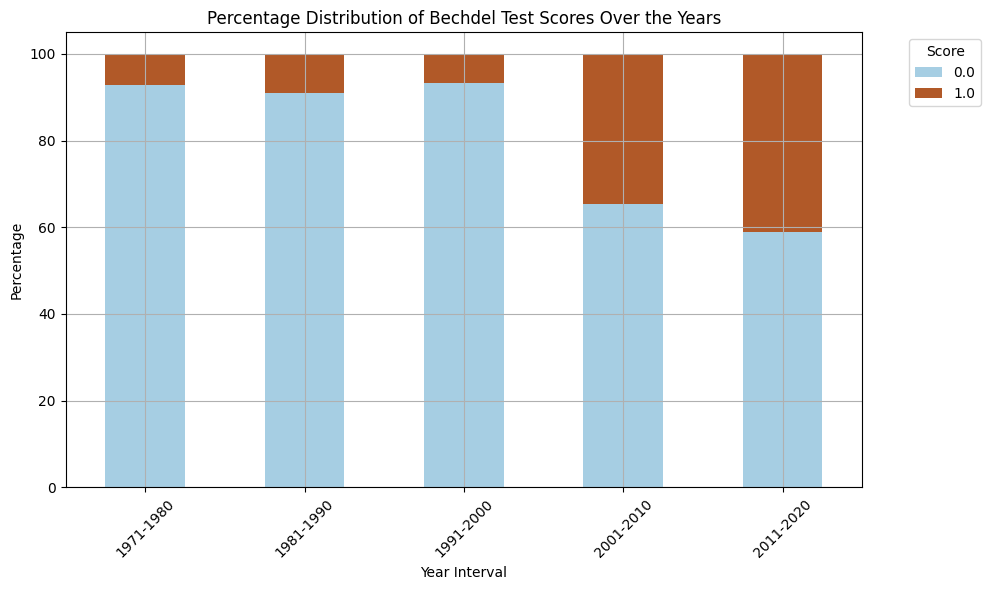

In [ ]:
# Ensure 'Release Year' is an integer
df['Release Year'] = df['Release Year'].astype(int)

# Add 'year_interval' column
df['year_interval'] = (df['Release Year'] // 10 * 10 + 1).astype(str) + '-' + (df['Release Year'] // 10 * 10 + 10).astype(str)

# Create a pivot table for plotting
pivot_df = df.pivot_table(index='year_interval', columns='score', aggfunc='size', fill_value=0)

# Calculate percentage
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Filter to exclude intervals after 2020
pivot_df_percentage = pivot_df_percentage.loc[pivot_df_percentage.index <= '2020']

# Plotting
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')

# Adding labels and title
plt.title('Percentage Distribution of Bechdel Test Scores Over the Years')
plt.xlabel('Year Interval')
plt.ylabel('Percentage')
plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


<ipython-input-53-61e845ad0409>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Language'], order=df['Language'].value_counts().index, palette=custom_palette)


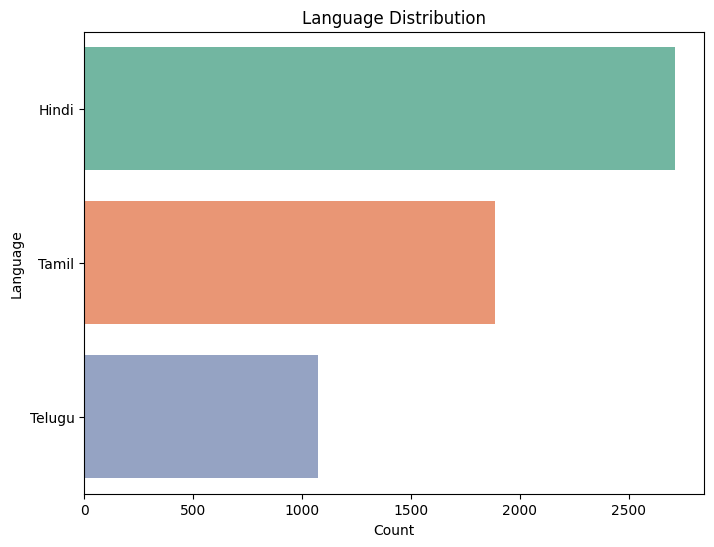

In [ ]:
# Language Distribution
plt.figure(figsize=(8, 6))

# Define a custom color palette
custom_palette = sns.color_palette("Set2", len(df['Language'].unique()))

sns.countplot(y=df['Language'], order=df['Language'].value_counts().index, palette=custom_palette)
plt.title('Language Distribution')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

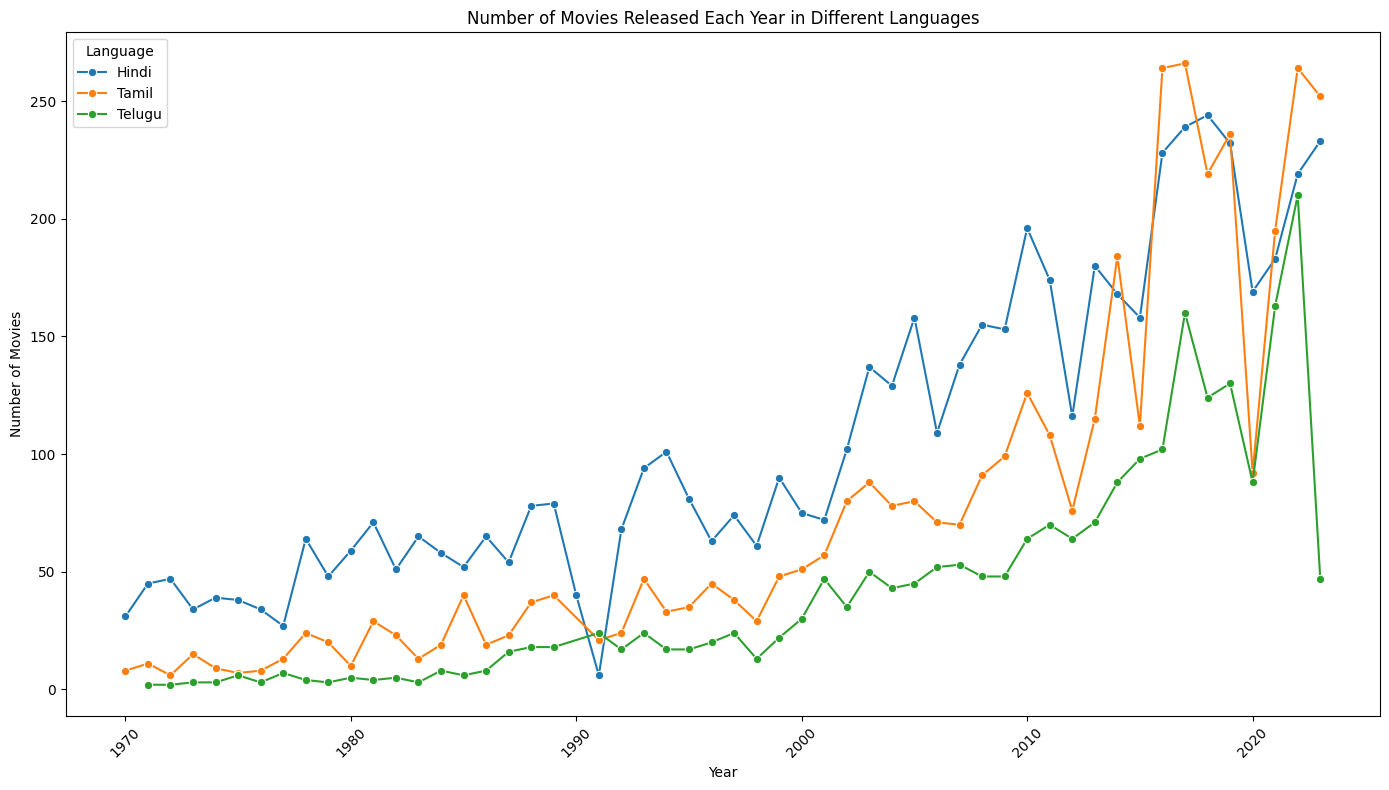

In [ ]:
# Group by 'Release Year' and 'Language' and count the number of movies
movies_per_year_language = df.groupby(['Release Year', 'Language']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=movies_per_year_language, x='Release Year', y='Count', hue='Language', marker='o')
plt.title('Number of Movies Released Each Year in Different Languages')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Release Year
2011    352
2012    256
2013    366
2014    440
2015    368
2016    594
2017    665
2018    587
2019    598
2020    349
2021    541
2022    693
2023    532
Name: count, dtype: int64


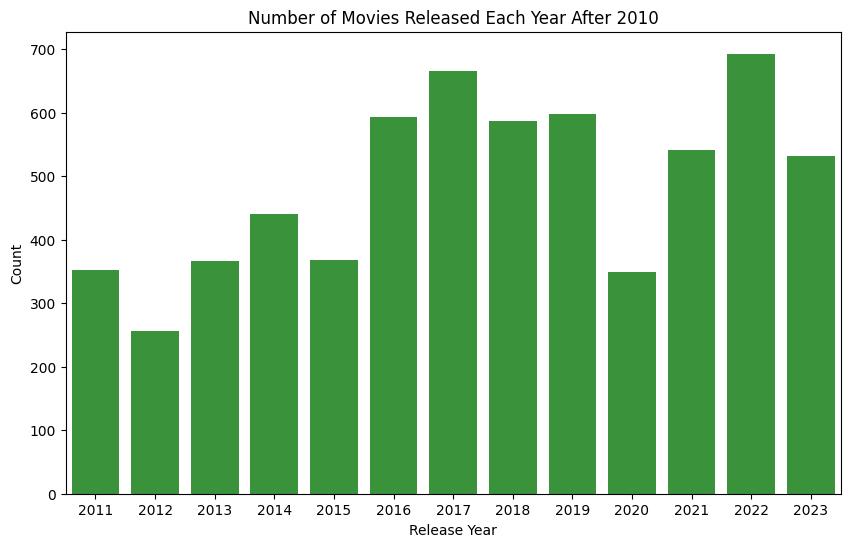

In [ ]:
# Filter the dataset for years after 2010
df_after_2010 = df[df['Release Year'] > 2010]

# Count of movies released each year after 2010
movies_count_after_2010 = df_after_2010['Release Year'].value_counts().sort_index()

# Display the count
print(movies_count_after_2010)

# Visualize the count
plt.figure(figsize=(10, 6))

# Define custom color
bar_color = '#2ca02c'

sns.countplot(x='Release Year', data=df_after_2010, color=bar_color)
plt.title('Number of Movies Released Each Year After 2010')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

there is a dip because of covid 19

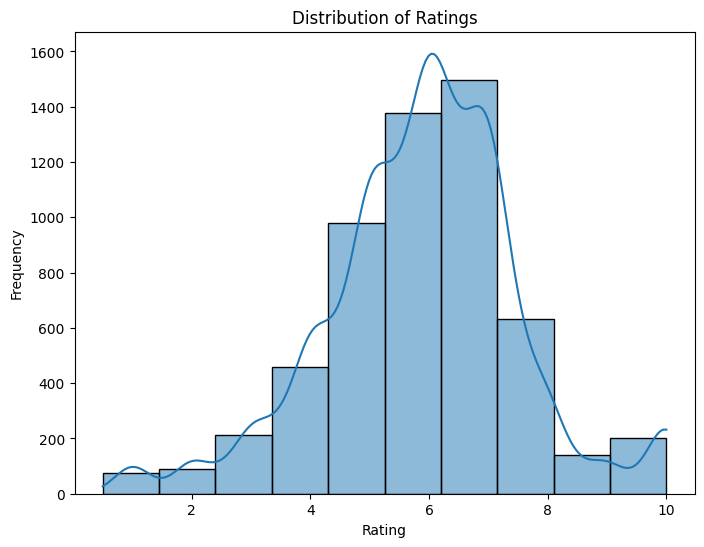

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

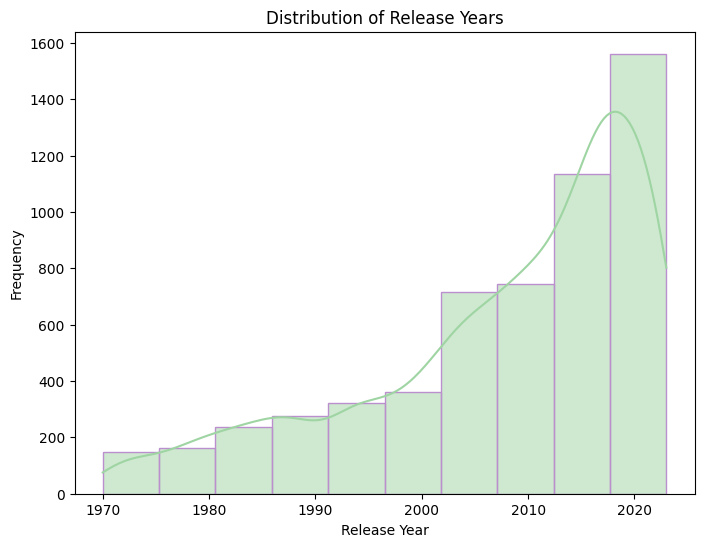

In [ ]:
# Distribution of Release Years
plt.figure(figsize=(8, 6))
sns.histplot(df['Release Year'], bins=10, kde=True,color='#9FD4A3', edgecolor='#BB8FCE')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


# Answering questions

1) The Evolution of Gender Representation in Indian Cinema: How have Bechdel Test scores in Indian movies evolved over the years? Are contemporary Indian films more likely to pass the test compared to older ones?

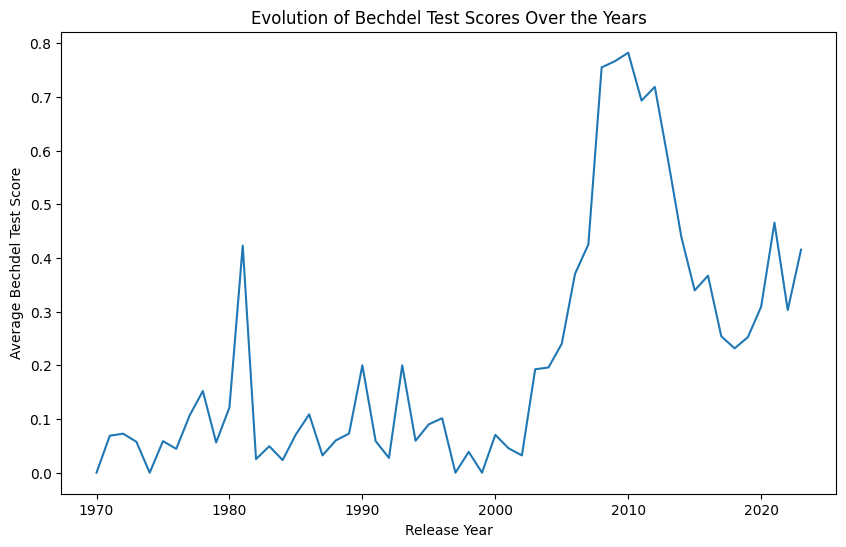

In [ ]:
plt.figure(figsize=(10, 6))
evolution_data = df.groupby('Release Year')['score'].mean().reset_index()
sns.lineplot(data=evolution_data, x='Release Year', y='score')
plt.title('Evolution of Bechdel Test Scores Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Bechdel Test Score')
plt.show()

2) Impact of Language on Representation: How do movies in different Indian languages fare on the Bechdel Test? Is there a significant difference in the scores based on the language of the film?

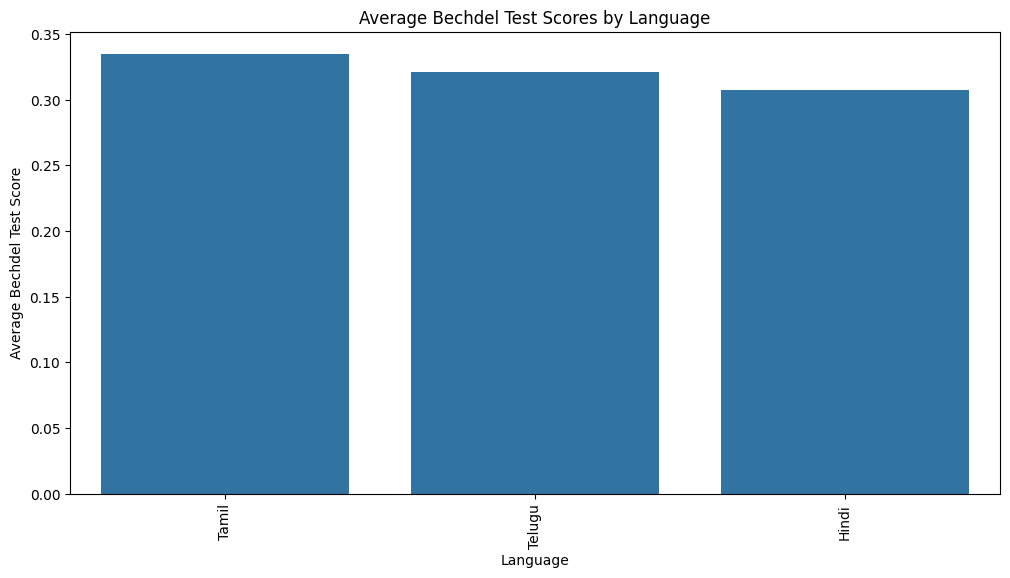

In [ ]:
plt.figure(figsize=(12, 6))
language_data = df.groupby('Language')['score'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=language_data, x='Language', y='score')
plt.title('Average Bechdel Test Scores by Language')
plt.xlabel('Language')
plt.ylabel('Average Bechdel Test Score')
plt.xticks(rotation=90)
plt.show()

3) Historical Analysis of Female Representation: How has the representation of women in Indian cinema changed across different decades? Are there specific periods where there was a noticeable shift in Bechdel Test scores?

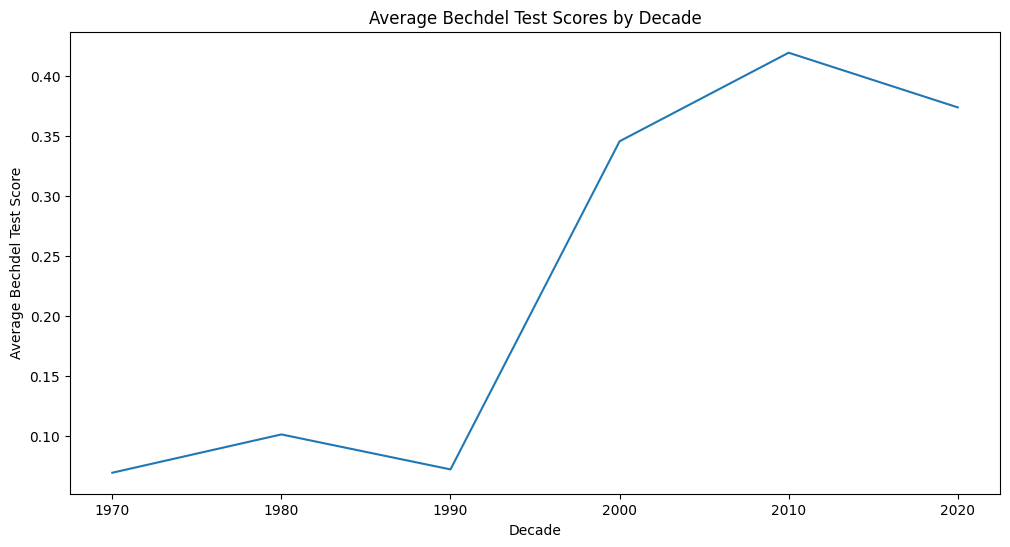

In [ ]:
#Historical Analysis of Female Representation
df['Decade'] = (df['Release Year'] // 10) * 10
plt.figure(figsize=(12, 6))
decade_data = df.groupby('Decade')['score'].mean().reset_index()
sns.lineplot(data=decade_data, x='Decade', y='score')
plt.title('Average Bechdel Test Scores by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Bechdel Test Score')
plt.show()

4) Ratings vs. Gender Representation in Indian Movies: Is there a correlation between the Bechdel Test scores and the ratings of Indian movies? Do higher-rated films tend to have better gender representation, as indicated by their Bechdel Test scores?



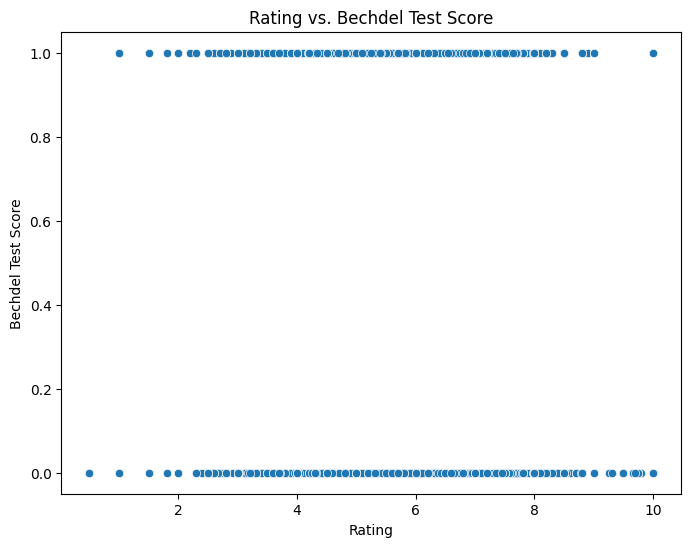

In [ ]:
# Rating vs. Bechdel Test Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Rating'], y=df['score'])
plt.title('Rating vs. Bechdel Test Score')
plt.xlabel('Rating')
plt.ylabel('Bechdel Test Score')
plt.show()

5) Has the correlation between passing the Bechdel Test and a movie's rating changed over the years?

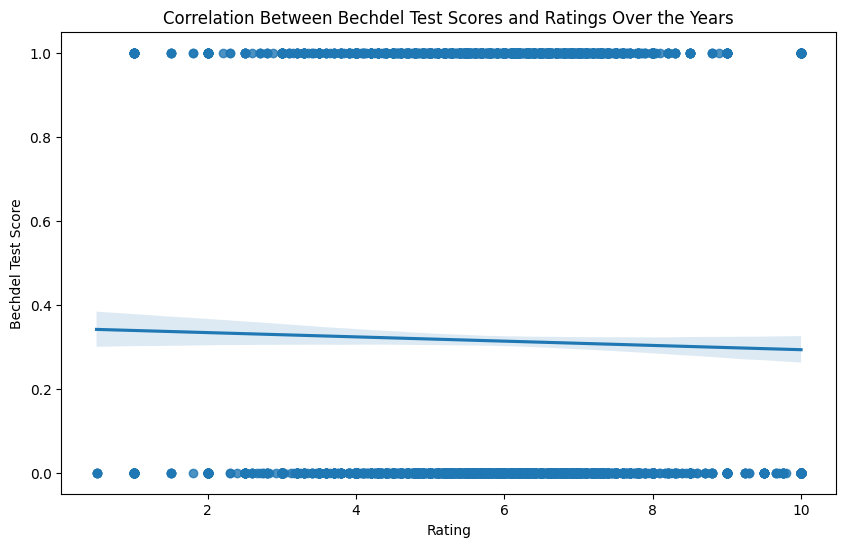

<Figure size 1400x800 with 0 Axes>

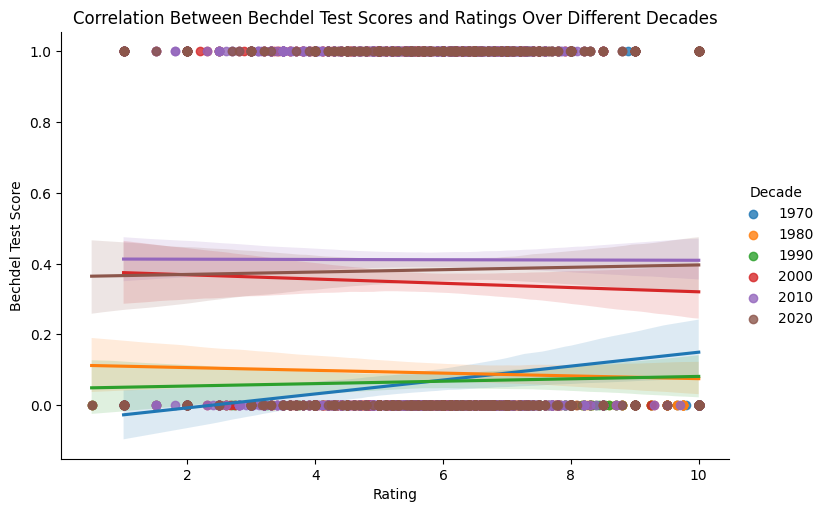

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='score', data=df)
plt.title('Correlation Between Bechdel Test Scores and Ratings Over the Years')
plt.xlabel('Rating')
plt.ylabel('Bechdel Test Score')
plt.show()

# Correlation over different time periods
df['Decade'] = (df['Release Year'] // 10) * 10
plt.figure(figsize=(14, 8))
sns.lmplot(x='Rating', y='score', hue='Decade', data=df, aspect=1.5)
plt.title('Correlation Between Bechdel Test Scores and Ratings Over Different Decades')
plt.xlabel('Rating')
plt.ylabel('Bechdel Test Score')
plt.show()


6) Genre-Specific Analysis: Do certain genres in Indian cinema perform better on the Bechdel Test? For instance, do family dramas, action films, or comedies show varying degrees of gender representation?

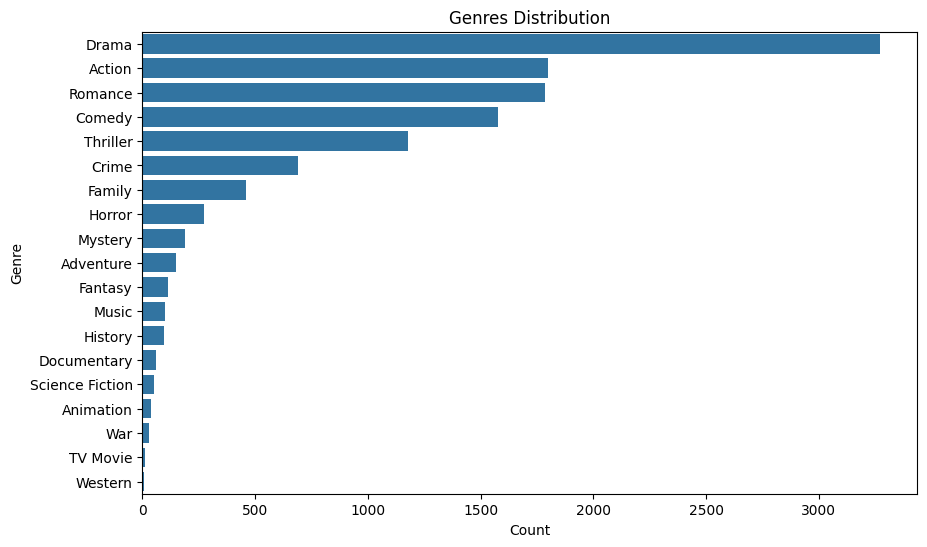

In [ ]:
# Genres Analysis
df['Genres'] = df['Genres'].str.split(', ')
all_genres = df.explode('Genres')['Genres']
plt.figure(figsize=(10, 6))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title('Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


7)Audience Reception and Gender Representation: Do films that pass the Bechdel Test receive better audience reception compared to those that do not? How does the representation of women influence viewer ratings and reviews?

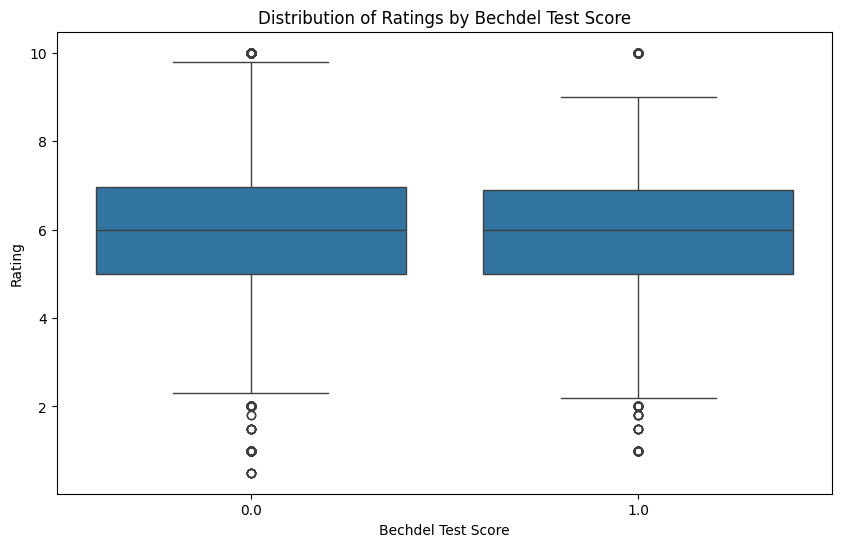

In [ ]:
# Audience Reception and Gender Representation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='score', y='Rating')
plt.title('Distribution of Ratings by Bechdel Test Score')
plt.xlabel('Bechdel Test Score')
plt.ylabel('Rating')
plt.show()

8) Influence of Cultural and Social Movements: How have significant cultural and social movements in India impacted the gender representation in movies as reflected by Bechdel Test scores?

In [ ]:
# Add significant cultural and social movements
movements = [
    {'year': 1975, 'event': 'The Emergency (1975-1977)'},
    {'year': 1991, 'event': 'Economic Liberalization'},
    {'year': 2012, 'event': 'Delhi Gang Rape Protests'},
    {'year': 2018, 'event': 'Me Too Movement in India'},
]

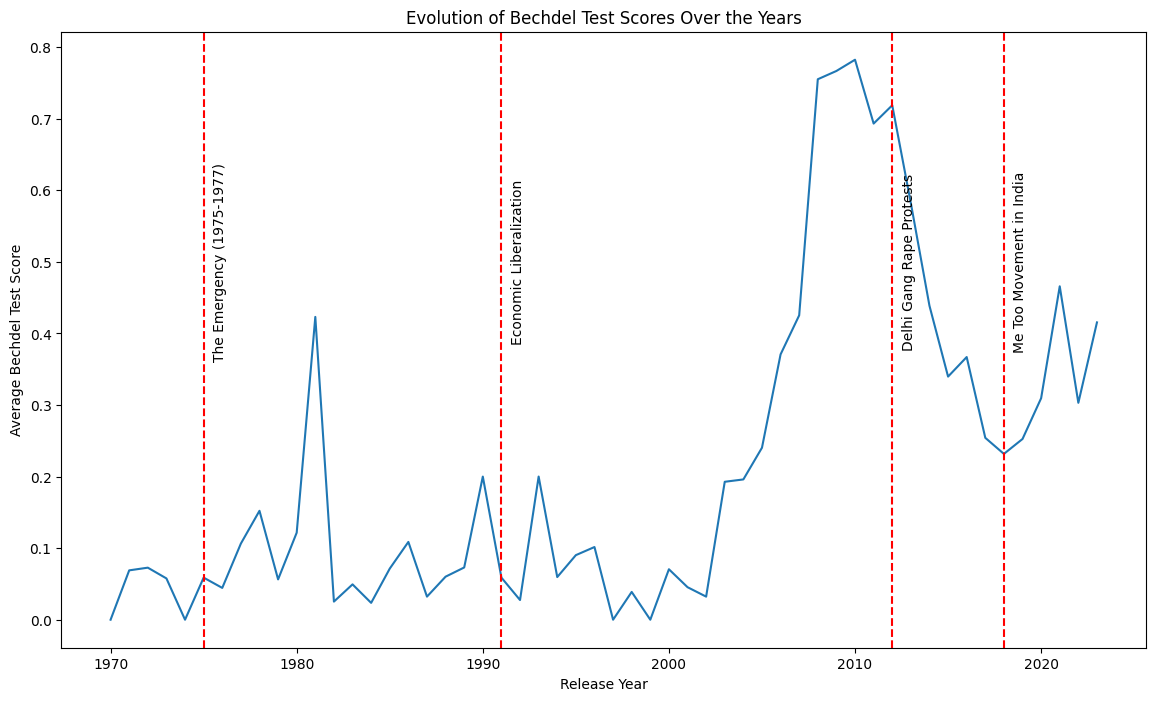

In [ ]:
# Plot Bechdel Test scores over time
plt.figure(figsize=(14, 8))
evolution_data = df.groupby('Release Year')['score'].mean().reset_index()
sns.lineplot(data=evolution_data, x='Release Year', y='score')
plt.title('Evolution of Bechdel Test Scores Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Bechdel Test Score')

# Annotate with cultural and social movements
for movement in movements:
    plt.axvline(x=movement['year'], color='r', linestyle='--')
    plt.text(movement['year'] + 0.5, 0.5, movement['event'], rotation=90, verticalalignment='center')

plt.show()